# John's EDA

### **Importing Modules**

In [2]:
#Importing Modules
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# **1. Working on Cases/Deaths per State Data over time**

Action Plan:
1) Load COVID19 cases/deaths/state/over time data.  
2) Create dataframe with columns for each state's cases or deaths over time  
3) Pickle and simple plot

## *Retrieving data and Formatting*

In [3]:
#Reading and Filtering Files
counties = pd.read_csv("Data_Raw\\us-counties.csv", index_col=['date'])
header=['date', 'county', 'state', 'fips', 'cases', 'deaths']
dates = pd.DatetimeIndex(counties.index)
dates=dates.strftime('%B-%d')
counties.index=dates
counties.head()
#len(counties)

,county,state,fips,cases,deaths
date,,,,,
January-21,Snohomish,Washington,"53,061",1,0
January-22,Snohomish,Washington,"53,061",1,0
January-23,Snohomish,Washington,"53,061",1,0
January-24,Cook,Illinois,"17,031",1,0
January-24,Snohomish,Washington,"53,061",1,0


## *Generating Data Frame for Cases by State*

In [4]:
#Step 1: Summing all the cases on April 15 in California
total = 0
filtered = counties[(counties.index=='April-15')&(counties['state']=='California')]['cases']
for i in range(0,len(filtered)):
    #print(counties[(counties.index==each)&(counties['state']=='California')]['cases'][i])
    total += counties[(counties.index=='April-15')&(counties['state']=='California')]['cases'][i]
print("Cases in California on April 15:", total)

Cases in California on April 15: 27107


#### Instruction -> turn this cell to code, when running, expect waiting time  
#Step 2: Summing all the cases on all dates in 5 states (took John 1+ minutes to load)

states = ['California', 'Colorado', 'Kansas', 'New York', 'Washington']
#states = ['California']  <- tried it on California first to match step 1
cases={}
for state in states:
    cases_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['cases'][i]
        cases_list.append(total)
    cases[state]=cases_list

#### Instruction -> turn this cell to code, when running, expect waiting time  
#Step 3: Summing all the cases on all dates in all states (took John 7+ minutes to load)

states = list(counties.state.unique())
#states = ['California', 'Colorado', 'Kansas', 'New York', 'Washington'] #<- this was used in step 2
#states = ['California']  #<- tried it on California first to match step 1
cases={}
for state in states:
    cases_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['cases'][i]
        cases_list.append(total)
    cases[state]=cases_list


#### Instruction -> this cell needs the previous 2 cells  
#Creating a separate data frame for Date and number of cases reported in each of the 55 unique states
states = list(counties.state.unique())

data = {'calendar':list(counties.index.unique())}
for state in states:
    data[state] = cases[state]
    
cases_by_state = pd.DataFrame(data)
cases_by_state

## *Generating Data Frame for Deaths by State*

#### Instruction -> turn this cell to code, when running, expect waiting time  
#Repeat previous section for cases but for deaths

states = list(counties.state.unique())
deaths={}
for state in states:
    deaths_list=[]
    for each in counties.index.unique():
        total = 0
        filtered = counties[(counties.index==each)&(counties['state']==state)]['deaths']
        for i in range(0,len(filtered)):
            total += counties[(counties.index==each)&(counties['state']==state)]['deaths'][i]
        deaths_list.append(total)
    deaths[state]=deaths_list


#### Instruction -> this cell needs the previous cell ran
#Creating a separate data frame for Date and number of cases reported in each of the 55 unique states
states = list(counties.state.unique())
data2 = {'calendar':list(counties.index.unique())}
for state in states:
    data2[state] = deaths[state]
    
deaths_by_state = pd.DataFrame(data2)
deaths_by_state

## *Data Minification*
Save the final dataframes as pickle files.

#### This cell requires previous cell to be ran.
cases_by_state.to_pickle('Data_pkl\\cases_by_state.pkl')
deaths_by_state.to_pickle('Data_pkl\\deaths_by_state.pkl')

Read Pickle Files

In [7]:
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')

## *Initial Plots*

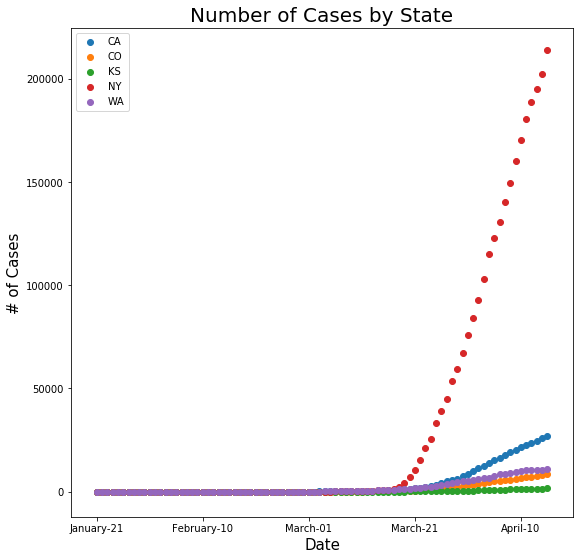

In [47]:
# Cases by State Plots
fig, axs = plt.subplots(figsize=(9,9))

#scatter of each of the 5 states
axs.scatter(df1.calendar,df1.California)
axs.scatter(df1.calendar,df1.Colorado)
axs.scatter(df1.calendar,df1.Kansas)
axs.scatter(df1.calendar,df1['New York'])
axs.scatter(df1.calendar,df1.Washington)

#Labeling
axs.set_title("Number of Cases by State", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

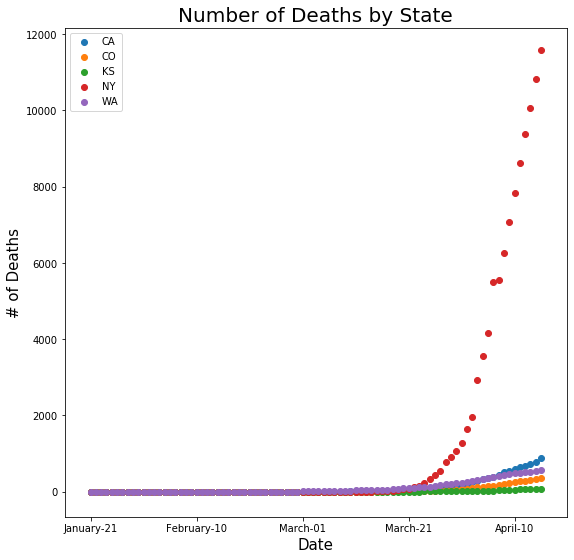

In [48]:
# Deaths by State Plots
fig, axs = plt.subplots(figsize=(9,9))

#scatter of each of the 5 states
axs.scatter(df2.calendar,df2.California)
axs.scatter(df2.calendar,df2.Colorado)
axs.scatter(df2.calendar,df2.Kansas)
axs.scatter(df2.calendar,df2['New York'])
axs.scatter(df2.calendar,df2.Washington)

#Labeling
axs.set_title("Number of Deaths by State", fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

# **Working on Population & Density Cases/Deaths on April 15th**

Action Plan:
1) Gather datasets needed to find Population Versus Cases and Deaths.  
2) Merge three data tables together: Population/ZipCode;  FIPS/ZIP Conversion;  COVID19 cases/death data  
3) Pickle and simple plot

**note:** FIPS = County Code

## *Retrieving data and Formatting - Population (& later-on add Density)*

In [122]:
#Reading and Filtering Files
population = pd.read_csv("Data_Raw\\population_by_zip_2010.csv")   #Population by Zip Code Data
fips_zip = pd.read_excel("Data_Raw\\fips_zip\ZIP_COUNTY_032020.xlsx")  #Conversion between FIPS and ZIP Data
counties_2 = pd.read_csv("Data_Raw\\us-counties.csv")                  #COVID19 cases/deaths data
counties_2["date"] = pd.to_datetime(counties_2["date"])
counties_2["date"] = counties_2["date"].dt.strftime('%B-%d')

#population.head()
#fips_zip.head()
#counties_2.head()

In [124]:
#Formatting Population by Zip Code Data
population_byzip = population[['zipcode','population']]     #Only need zip code and population columns

#Since there are multiple zipcodes with population (males,females,etc..), sum up the population of each zip code and group
population_byzip = population_byzip.groupby('zipcode').agg('sum')    
population_byzip.head()
#len(population_byzip)
#population_byzip[population_byzip.index==66503]     #test out to see your LOCAL zipcode population, 66503 (Manhattan, KS) has 42k people in 2010, sounds reasonable.

,population
zipcode,
602,124560
603,164067
606,19845
610,87048
612,201030


In [123]:
#Formatting FIPS/ZIP Data
fips_zip = fips_zip[['ZIP','COUNTY']]   #Only need ZIP and COUNTY (same as fips) columns
fips_zip.head()
#len(fips_zip)

,ZIP,COUNTY
0,501,36103
1,601,72113
2,601,72001
3,602,72003
4,602,72005


In [ ]:
#Formatting COVID19 cases/deaths Data
counties_2_apr15 = counties_2[counties_2.date=='April-15'][['fips','cases','deaths']]   #only need latest (APril-15) data for FIPS, cases, deaths
counties_2_apr15 = counties_2_apr15.dropna()  #need to drop NA
counties_2_apr15.head()
#len(counties_2_apr15.fips)

## *MERGING Data*


In [126]:
#Merge population by zip with FIPS/ZIPs data to get population by FIPS

pop_zipfips = population_byzip.merge(fips_zip, how='left', left_on='zipcode', right_on='ZIP')    #Merging data
#pop_zipfips.head()
population_byfips = pop_zipfips[['population','COUNTY']]                  #drop zip code now, not needed anymore

#Since population data was based on zip codes, there are multiple zip codes per FIPS/County Code.
#Therefore, group by FIPS code and sum up the population in each FIPS code
population_byfips = population_byfips.groupby('COUNTY').agg('sum')        
population_byfips.head()
#len(population_byfips.index.unique())

,population
COUNTY,
"1,001",253557
"1,003",606642
"1,005",97455
"1,007",228414
"1,009",471114


In [127]:
#Merge population by FIPS with COVID19 cases/deaths data to get population versus deaths/cases

casedeath_pop = counties_2_apr15.merge(population_byfips, how='left', left_on = 'fips', right_on = 'COUNTY')   #Merging data
casedeath_pop.head()
#len(casedeath_pop)

,fips,cases,deaths,population
0,"1,001",25,1,"253,557"
1,"1,003",98,2,"606,642"
2,"1,005",13,0,"97,455"
3,"1,007",19,0,"228,414"
4,"1,009",17,0,"471,114"


## *Data Minification*
Save the final dataframes as pickle files.

In [129]:
casedeath_pop.to_pickle('Data_pkl\\cases_deaths_population.pkl')

In [130]:
df3 = pd.read_pickle('Data_pkl\\cases_deaths_population.pkl')

## *Initial Plot*

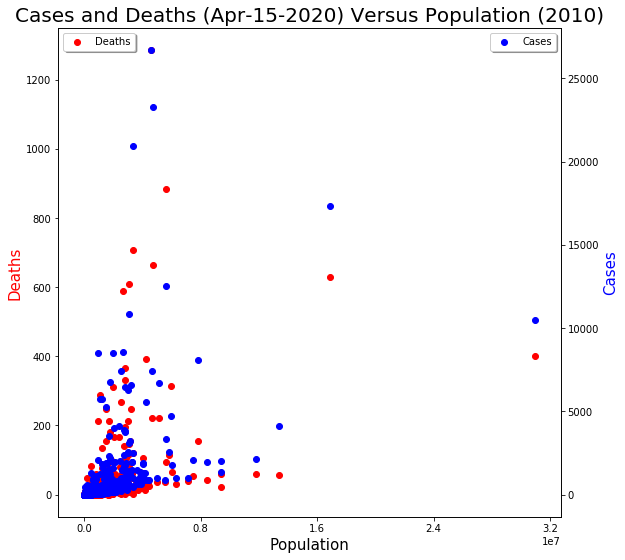

In [132]:
# Cases by Population
fig, axs = plt.subplots(figsize=(9,9))

#scatterplot
axs.scatter(df3.population,df3.deaths, color='r')
axs2 = axs.twinx()
axs2.scatter(df3.population,df3.cases, color='b')
axs.legend(['Deaths'], loc = 'upper left', shadow=True)
axs2.legend(['Cases'], shadow=True)

#Labeling
axs.set_title("Cases and Deaths (Apr-15-2020) Versus Population (2010)", fontsize=20)
axs.set_ylabel('Deaths', fontsize=15, color = 'r')
axs2.set_ylabel('Cases', fontsize=15, color = 'b')
axs.set_xlabel('Population', fontsize=15)
axs.xaxis.set_major_locator(plt.MaxNLocator(5))
